# HathiTrust Research Center (HTRC)

The [HathiTrust Digital Library](https://www.hathitrust.org/) contains over 14 million volumes scanned from academic libraries around the world (primarily in North America). The [HathiTrust Research Center](https://analytics.hathitrust.org/) allows researchers to access almost all of those texts in a few different modes for computational text analysis. 

This notebook will walk us through getting set-up to analyze [HTRC Extracted Features](https://wiki.htrc.illinois.edu/display/COM/Extracted+Features+Dataset) for volumes in HathiTrust in a Jupyter/Python environment. *Extracted Features* offer a highly robust access point for in-copyright works from the HT Library for computational analysis. 

For more information on HTRC see [Programming Historian's Text Mining in Python through the HTRC Feature Reader](http://programminghistorian.org/lessons/text-mining-with-extracted-features)

## Installation

To start let's install a few helpful tools, starting with the *HTRC Feature Reader* to work with Extracted Features: 

In [2]:
# you can pip install from the shell, or use sys to execute pip install within jupyter
import sys
!{sys.executable} -m pip install htrc-feature-reader

In [46]:
from htrc_features import FeatureReader
import pandas as pd
import glob
%matplotlib inline

## Downloading Extracted Freatures from HathiTrust

Let's use the [HTRC Workset Builder](https://solr2.htrc.illinois.edu/solr-ef/) to find and download the extracted features for a single volume to start. 

### Single book
I searched for the author *Louise Erdrich* in the workset builder and found her book, *Love Medicine* in the search results. You can select the "Download Extracted Features" link under a search result to download a JSON file for the book's full features.

![Selecting Love Medicine from the Workset Builder](img/erdrich_2.png)

It's slightly more complicated to work with multiple volumes from HTRC. See the bottom of this notebook for instructions on how to do so.

### Working with Extracted Features
The content for each volume is stored in a compressed JSON file. In the example below, I downloaded the JSON file for *Love Medicine* into the same directory as this Jupyter notebook. Make sure you use the correct path below to point to your JSON file.

In [4]:
#if you're using a single book point to the .json file
#I changed over to using multiple volumes here already. I think I deleted the code analyzing 
#'Love Medicine,' but hopefully it's saved somewhere
volumes = glob.glob('*.json')

In [5]:
#import os
#if using mac use: paths = glob.glob("erdrich/*.json.bz2")
#paths = [os.path.join('erdrich/', 'inu.30000039114859.json.bz2'), os.path.join('erdrich/', 'inu.30000041114236.json.bz2')]
# if using a PC use this: 
paths = glob.glob("erdrich\\*.json.bz2") #this may be a PC thing to have '\\' rather than '/'
fr = FeatureReader(paths)
for vol in fr.volumes():
    print(vol.title)

None
['erdrich\\inu.30000039114859.json.bz2', 'erdrich\\inu.30000041114236.json.bz2', 'erdrich\\mdp.39015010832841.json.bz2', 'erdrich\\mdp.39015031716551.json.bz2', 'erdrich\\mdp.39015031818787.json.bz2', 'erdrich\\mdp.39015034038862.json.bz2', 'erdrich\\mdp.39015040036579.json.bz2', 'erdrich\\mdp.39015048567476.json.bz2', 'erdrich\\mdp.39015048771235.json.bz2', 'erdrich\\mdp.39015054189942.json.bz2', 'erdrich\\mdp.39015056813671.json.bz2', 'erdrich\\mdp.49015002565050.json.bz2', 'erdrich\\mdp.49015002568237.json.bz2', 'erdrich\\uc1.32106017511640.json.bz2']
Route 2 / Louise Erdrich and Michael Dorris.
The falcon : a narrative of the captivity and adventures of John Tanner / with an introduction by Louise Erdrich.
Love medicine : a novel / by Louise Erdrich.
The blue jay's dance : a birth year / Louise Erdrich.
The bingo palace / Louise Erdrich.
The blue jay's dance : a birth year / Louise Erdrich.
The antelope wife : a novel / Louise Erdrich.
The birchbark house / Louise Erdrich with

We can now cycle through properties of the `FeatureReader()`. Since we're working with a single JSON file, instead of a zip of multiple volumes, we're going to pass the parameter `compressed=False`. The data and metadata we want to access will be stored in the `.volumes()` method of FeatureReader.

In [118]:
#if you're looking at the uncompressed JSON file for one book use the parameter 'compressed=False'
#fr = FeatureReader(paths, compressed=False)
#vol = fr.first() (for dealing with just one volume)
for vol in fr.volumes():
    print(vol.id, '\n', vol.title, '\n', vol.author)

inu.30000039114859 
 Route 2 / Louise Erdrich and Michael Dorris. 
 ['Erdrich, Louise. ', 'Dorris, Michael. ']
mdp.39015010832841 
 Love medicine : a novel / by Louise Erdrich. 
 ['Erdrich, Louise. ']
mdp.39015031818787 
 The bingo palace / Louise Erdrich. 
 ['Erdrich, Louise. ']
mdp.39015034038862 
 The blue jay's dance : a birth year / Louise Erdrich. 
 ['Erdrich, Louise. ']
mdp.39015040036579 
 The antelope wife : a novel / Louise Erdrich. 
 ['Erdrich, Louise. ']
mdp.39015048567476 
 The birchbark house / Louise Erdrich with illustrations by the author. 
 ['Erdrich, Louise. ']
mdp.39015054189942 
 Tracks : a novel / by Louise Erdrich. 
 ['Erdrich, Louise. ']
mdp.39015056813671 
 Books and islands in Ojibwe country / Louise Erdrich. 
 ['Erdrich, Louise. ']
mdp.49015002568237 
 Grandmother's pigeon / Louise Erdrich ; illustrated by Jim LaMarche. 
 ['Erdrich, Louise. ', 'LaMarche, Jim ill. ']
uc1.32106017511640 
 The falcon : a narrative of the captivity and adventures of John Tanner /

In [157]:
vol = fr.first()

**How to point to any volume in the dataset, not just the first?**

In [8]:
vol

In [158]:
vol.term_volume_freqs()

,token,pos,count
895,and,CC,38
40,",",",",38
2808,of,IN,36
42,.,.,36
3806,the,DT,36
...,...,...,...
2094,golden-green,JJ,1
700,Steamboat,NNP,1
2096,gone,VBN,1
2098,good-bye,NN,1


In [160]:
vol.begin_line_chars()

count
page section place char       
9    body    begin =         1
                   B         1
                   I         2
                   L         3
                   M         2
...                        ...
49   body    begin T         3
                   a         1
                   b         1
                   p         1
                   t         2

[648 rows x 1 columns]

Let's try to pull out some more metadata about these titles, using the [Volume object](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Volume) in `FeatureReader`. We'll get the HT URL, year, and page count for each volume.

In [9]:
for vol in fr.volumes():
    print("URL: %s \nYear: %s \nPage count: %s " % (vol.handle_url, vol.year, vol.page_count))

URL: http://hdl.handle.net/2027/inu.30000039114859 
Year: 1991 
Page count: 56 
URL: http://hdl.handle.net/2027/inu.30000041114236 
Year: 1994 
Page count: 312 
URL: http://hdl.handle.net/2027/mdp.39015010832841 
Year: 1984 
Page count: 292 
URL: http://hdl.handle.net/2027/mdp.39015031716551 
Year: 1995 
Page count: 248 
URL: http://hdl.handle.net/2027/mdp.39015031818787 
Year: 1994 
Page count: 296 
URL: http://hdl.handle.net/2027/mdp.39015034038862 
Year: 1995 
Page count: 246 
URL: http://hdl.handle.net/2027/mdp.39015040036579 
Year: 1998 
Page count: 264 
URL: http://hdl.handle.net/2027/mdp.39015048567476 
Year: 1999 
Page count: 264 
URL: http://hdl.handle.net/2027/mdp.39015048771235 
Year: 1999 
Page count: 264 
URL: http://hdl.handle.net/2027/mdp.39015054189942 
Year: 1988 
Page count: 248 
URL: http://hdl.handle.net/2027/mdp.39015056813671 
Year: 2003 
Page count: 176 
URL: http://hdl.handle.net/2027/mdp.49015002565050 
Year: 1999 
Page count: 264 
URL: http://hdl.handle.net/20

The `source_institution` tells us where the volumes were scanned:

In [10]:
for vol in fr.volumes():
    print("Source institution: %s " % (vol.source_institution))

Source institution: INU 
Source institution: INU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: MIU 
Source institution: UC 


We can take a closer look at the first volume using `.first()`. In this case there's only one volume in our list. 

In [11]:
vol = fr.first()
vol.title

'Route 2 / Louise Erdrich and Michael Dorris.'

### Tokens (features) from the book

The `tokens_per_page` method will give us the words in the volume:

In [12]:
tokens = vol.tokens_per_page()
tokens.head()

page
1    0
2    0
3    0
4    0
5    0
Name: tokenCount, dtype: int64

We can easily plot the number of tokens across every page of the book, which makes it easy to see where chapters begin and end.

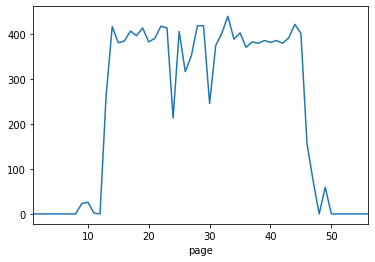

In [13]:
tokens.plot()

Now let's look at some specific pages, using the [Page object in FeatureReader](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Page). 

In [14]:
pages = [page for page in vol.pages()]

Then we'll index the 100th page.

In [15]:
#page_100 = pages[99]
#the first volume of this workset only has 56 pages so I changed all 'page_100's to 'page_25' going forward
page_25 = pages[24]

In [16]:
print("The body has %s lines, %s empty lines, and %s sentences" % (page_25.line_count(),
                                                                   page_25.empty_line_count(),
                                                                   page_25.sentence_count()))

The body has 32 lines, 0 empty lines, and 14 sentences


We can get a list of the tokens with the `tokenlist` method:

In [17]:
page_25.tokenlist().reset_index()

,page,section,token,pos,count
0,25,body,"""",'',1
1,25,body,"""",``,1
2,25,body,'oeuvres,.,1
3,25,body,'s,POS,7
4,25,body,",",",",43
...,...,...,...,...,...
243,25,body,whose,WP$,1
244,25,body,wind,VBP,1
245,25,body,wishes,NNS,1
246,25,body,with,IN,2


We can do this for every page and get a huge table!

In [18]:
all_pages_meta = pd.concat([p.tokenlist().reset_index() for p in pages], sort=False)
all_pages_meta.head()

,page,section,token,pos,count
0,9.0,body,",",",",1
1,9.0,body,9,CD,2
2,9.0,body,=,SYM,2
3,9.0,body,BLOOMINGTON,NN,1
4,9.0,body,California,NNP,1


Let's see what the most common tokens are in the book.

In [19]:
token_count = all_pages_meta.groupby(['token']).count()[['count']]

In [20]:
token_count.sort_values(by='count', ascending=False)[0:20]

,count
token,
"""",53
that,52
and,38
",",38
of,36
.,36
the,36
in,35
a,35


Let's get a more accurate (and interesting) count by normalizing the text, removing stop words, and so on.

In [21]:
#the following cell was not running but worked after I ran these lines. (Found at https://www.nltk.org/data.html)
import nltk
nltk.download()
#and then I downloaded all the packages (I'm not sure if this is necessary, but it fixed the issue)

KeyboardInterrupt: 

In [109]:
import string
punctuation = string.punctuation
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [111]:
token_count.index = [word.strip(string.punctuation).lower() for word in token_count.index]
print(token_count.index)

Index(['', '—it', '', 'apple', 'before', 'family', 'females', 'foreign',
       'forever', 'heart',
       ...
       'younger', 'your', 'zone', 'zoo', '©', '®', '—', '—', '—fast', '—soon'],
      dtype='object', length=3965)


## Working with multiple volumes

While it's pretty easy to work with a large corpus using FeatureReader, it takes a few extra steps to access the features for multiple volumes at once. 

1. If you don't already have an account with [HTRC Analytics](https://analytics.hathitrust.org), sign up for one there. 
2. Use the [HTRC Workset Builder](https://solr2.htrc.illinois.edu/solr-ef/) to select multiple volumes. I've selected a number of books by Louise Erdrich for the example below.
3. After selecting the search results you want, choose the *Add to Cart* button.
4. View your cart, and choose the *Export as Workset* button.
![Export your workset](img/workset.png)
5. This should take you to HTRC Analytics. Login, if you're not already, and add a title and description for your collection of texts.
6. Choose the *Download Extracted Features Helper* from the dropdown.
7. Enter a job name for your download, and Submit the form to generate your download.
8. Once the job has run, choose the job name, and select the button to *Click here to download EF_Rsync.sh*.
![Rsync download](img/rsync.png)

# Simple working with multiple volumes (no .sh files)

While it's pretty easy to work with a large corpus using FeatureReader, it takes a few extra steps to access the features for multiple volumes at once. 

1. If you don't already have an account with [HTRC Analytics](https://analytics.hathitrust.org), sign up for one there. 
2. Go to the [HTRC Workset Builder](https://solr2.htrc.illinois.edu/solr-ef/) website.
3. In the "volume metadata:" field enter "Louise Erdrich" and select "names" from the dropdown menu to the right. Then select search.
4. There should be 14 search results. This list includes a few duplicates and one volume about, rather than written by, Louise Erdrich. You can deselect these titles from the results page by clicking the 'x' in the top right corner of each volume description. (see image below)

![alt text](screenshot_4.png "Title")

5. You should deselect 4 volumes from these search results: one copy of "The blue jay's dance," one copy of "The birchbark house," one copy of "The falcon...," and "The broom closet..." This will give us a clean workset with no duplicates and with only books written by Louise Erdrich.
6. Now click on the "JSON Extracted features (ZIP)" link under the "Export Search Results" heading. This will download a zipped folder of JSON files. There will one file for each volume in the search results (10 in this case). 
7. Unzip the folder and save it as "erdrich_export" in the same folder that you saved this Jupyter notebook.
8. We now have a workset of 10 volumes of texts by Louise Erdrich and we can start analyzing them.

First let's initialize a variable and print the titles of the volumes to see our workset.

In [24]:
volumes = glob.glob('*.json')

In [25]:
#if using mac use: paths = glob.glob("erdrich_export/*.json.bz2")
#paths = [os.path.join('erdrich_export/', 'inu.30000039114859.json.bz2'), os.path.join('erdrich_export/', 'inu.30000041114236.json.bz2')]
# if using a PC use this: 
paths = glob.glob("erdrich_export\\*.json.bz2") #this may be a PC thing to have '\\' rather than '/'
fr = FeatureReader(paths)
for vol in fr.volumes():
    print(vol.title)

None
['erdrich_export\\inu.30000039114859.json.bz2', 'erdrich_export\\mdp.39015010832841.json.bz2', 'erdrich_export\\mdp.39015031818787.json.bz2', 'erdrich_export\\mdp.39015034038862.json.bz2', 'erdrich_export\\mdp.39015040036579.json.bz2', 'erdrich_export\\mdp.39015048567476.json.bz2', 'erdrich_export\\mdp.39015054189942.json.bz2', 'erdrich_export\\mdp.39015056813671.json.bz2', 'erdrich_export\\mdp.49015002568237.json.bz2', 'erdrich_export\\uc1.32106017511640.json.bz2']
Route 2 / Louise Erdrich and Michael Dorris.
Love medicine : a novel / by Louise Erdrich.
The bingo palace / Louise Erdrich.
The blue jay's dance : a birth year / Louise Erdrich.
The antelope wife : a novel / Louise Erdrich.
The birchbark house / Louise Erdrich with illustrations by the author.
Tracks : a novel / by Louise Erdrich.
Books and islands in Ojibwe country / Louise Erdrich.
Grandmother's pigeon / Louise Erdrich ; illustrated by Jim LaMarche.
The falcon : a narrative of the captivity and adventures of John Ta

# Multiple Volumes practice

In [31]:
fr.volumes

<bound method FeatureReader.volumes of <10 path FeatureReader (erdrich_export\inu.30000039114859.json.bz2 to erdrich_export\uc1.32106017511640.json.bz2)>>

# Challenge

Try typing `vol.` and then tab to see everything that's provided in the volume object:

In [ ]:
vol.

Advanced: Can you figure out how to show the most common tokens for a single page?

Advanced: Can you remove punctuation and stop words from a page or full volume?

**Define and describe FOR loop... Basic description of iteration, etc.**

We can create a list of our volumes by first defining an empty list, iterating through each of the volumes, and adding them to this list.

In [32]:
vol_list = [] #defining the empty list
for vol in fr.volumes():
    print("URL: %s \nYear: %s \nPage count: %s " % (vol.handle_url, vol.year, vol.page_count)) #View each volume being added
    vol_list.append(vol) #adding each volume to our previously empty list

URL: http://hdl.handle.net/2027/inu.30000039114859 
Year: 1991 
Page count: 56 
URL: http://hdl.handle.net/2027/mdp.39015010832841 
Year: 1984 
Page count: 292 
URL: http://hdl.handle.net/2027/mdp.39015031818787 
Year: 1994 
Page count: 296 
URL: http://hdl.handle.net/2027/mdp.39015034038862 
Year: 1995 
Page count: 246 
URL: http://hdl.handle.net/2027/mdp.39015040036579 
Year: 1998 
Page count: 264 
URL: http://hdl.handle.net/2027/mdp.39015048567476 
Year: 1999 
Page count: 264 
URL: http://hdl.handle.net/2027/mdp.39015054189942 
Year: 1988 
Page count: 248 
URL: http://hdl.handle.net/2027/mdp.39015056813671 
Year: 2003 
Page count: 176 
URL: http://hdl.handle.net/2027/mdp.49015002568237 
Year: 1996 
Page count: 36 
URL: http://hdl.handle.net/2027/uc1.32106017511640 
Year: 2000 
Page count: 312 


We can iterate through our list of volumes and print all of the metadata for each volume:

In [130]:
for vol in vol_list:
    print(vol.metadata)

=LDR  007426am a2200253 a 4500
=001  007593968
=003  MiAaHDL
=005  20100319000000.0
=006  m\\\\\\\\d\\\\\\\\
=007  cr\bn\---auaua
=008  910725c19911990caua\\\\\\\\\\000\0\eng\d
=020  \\$a0935716548
=035  \\$asdr-inu4193168
=035  \\$a(OCoLC)24131973
=040  \\$aBPL$cBPL$dIWA$dIUL
=090  \\$aE169.04$bE73x 1991
=092  \\$a917.3$bEr66r
=100  1\$aErdrich, Louise.
=245  10$aRoute 2 /$cLouise Erdrich and Michael Dorris.
=250  \\$a1st ed.
=260  \\$aNorthridge, Calif. :$bLord John Press,$c1991, c1990.
=300  \\$a34 p. :$bill. ;$c24 cm.
=500  \\$aColored ill. on lining papers.
=500  \\$aAn essay.
=538  \\$aMode of access: Internet.
=700  10$aDorris, Michael.
=740  01$aRoute two.
=CID  \\$a007593968
=DAT  0\$a20100319112245.0$b20100319000000.0
=DAT  1\$a20120814112212.0$b2018-05-15T18:02:17Z
=CAT  \\$aSDR-INU$dUNKNOWN$lloader.pl-001-001
=FMT  \\$aBK
=HOL  \\$0sdr-inu4193168$ainu$bSDR$cINU$pinu.30000039114859$sINU$14193168
=974  \\$bINU$cINU$d20180515$sgoogle$uinu.30000039114859$y1991$ric$qbib$tUS bib 

In [88]:
for vol in vol_list:
    if vol.metadata['260'].value() is not None:
        print("Title: %s \nPublisher info: %s " % (vol.title, vol.metadata['260'].value()))
    if vol.metadata['260'].value() is None:
        print("Title: %s \nPublisher info: %s " % (vol.title, vol.metadata['264'].value()))
#there is no '260' MARC field in the second to last volume so an I get an error
#Thus, neither it nor the one ofter it are iterated through
#The publisher metadata for this 9th volume is in the '264' field
#Alternatively, I'm not sure how to skip over the 9th volume with no '260' metadata

Title: Route 2 / Louise Erdrich and Michael Dorris. 
Publisher info: Northridge, Calif. : Lord John Press, 1991, c1990. 
Title: Love medicine : a novel / by Louise Erdrich. 
Publisher info: Toronto ; New York : Bantam Books, c1984. 
Title: The bingo palace / Louise Erdrich. 
Publisher info: New York : HarperCollinsPublishers, c1994. 
Title: The blue jay's dance : a birth year / Louise Erdrich. 
Publisher info: New York : HarperCollins Publishers, c1995. 
Title: The antelope wife : a novel / Louise Erdrich. 
Publisher info: New York : HarperFlamingo, c1998. 
Title: The birchbark house / Louise Erdrich with illustrations by the author. 
Publisher info: New York : Hyperion Books for Children, c1999. 
Title: Tracks : a novel / by Louise Erdrich. 
Publisher info: New York : Henry Holt, c1988. 
Title: Books and islands in Ojibwe country / Louise Erdrich. 
Publisher info: Washington, D.C. : National Geographic, c2003. 


AttributeError: 'NoneType' object has no attribute 'value'

Now let's graph the same line we did above for all of the volumes in our dataset. The number of tokens per page for each text is represented in the graphs below.

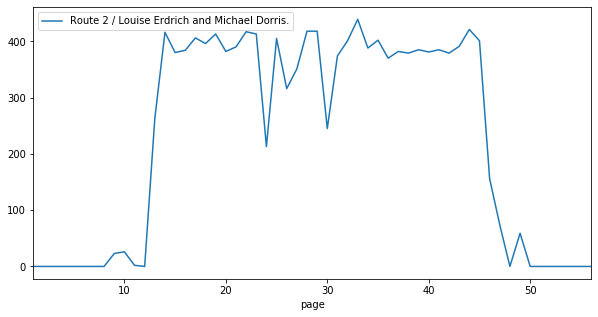

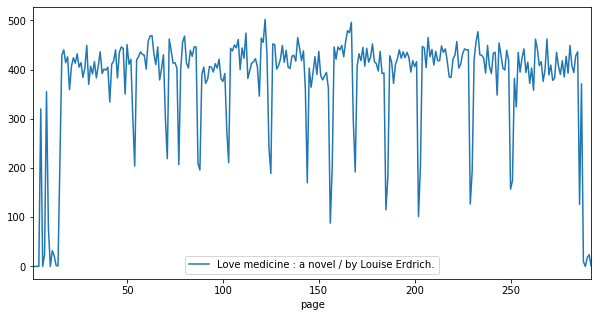

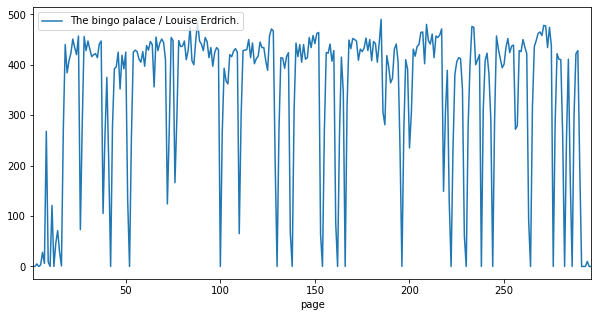

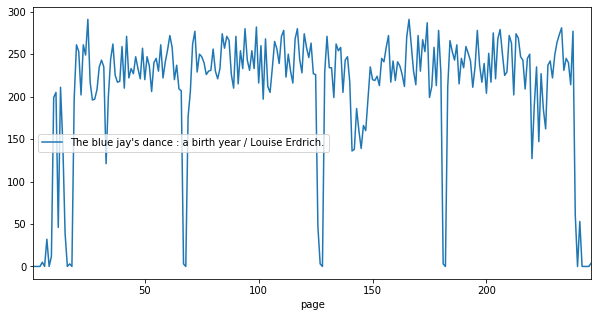

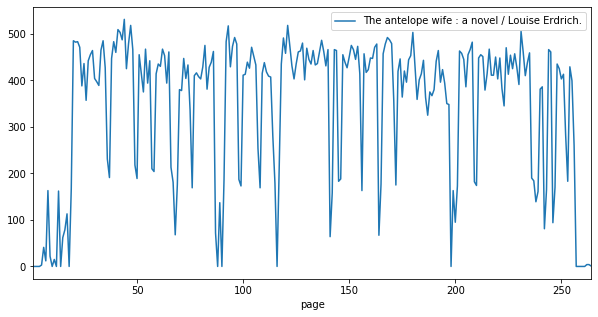

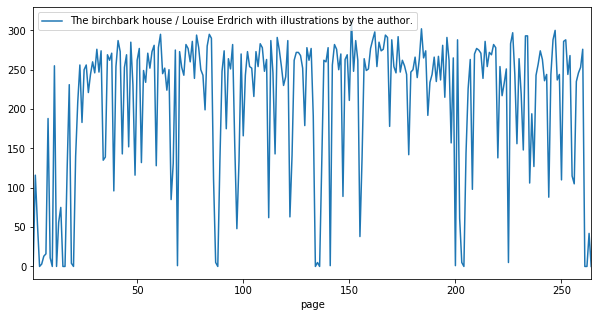

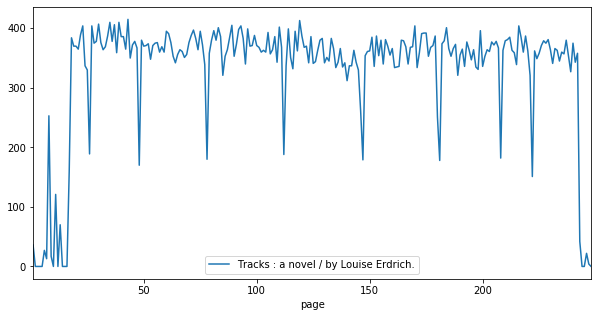

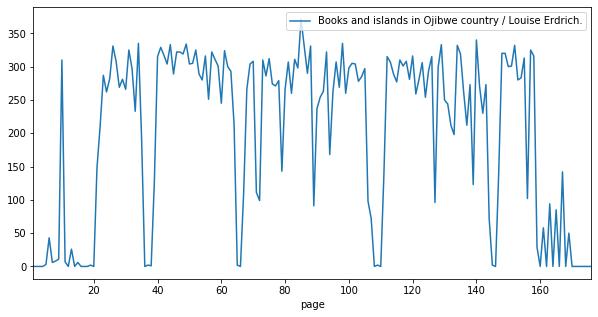

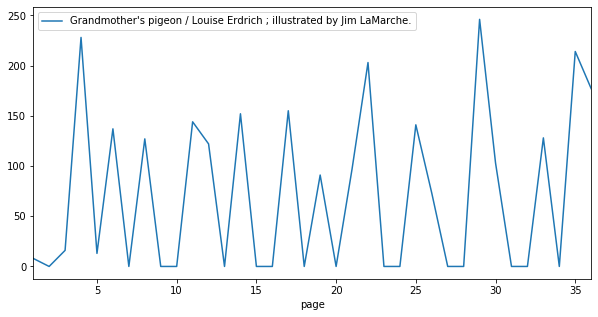

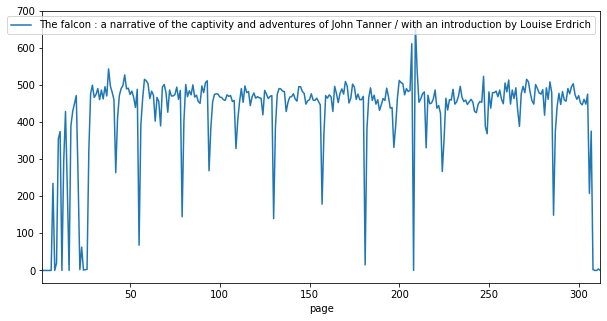

In [156]:
import matplotlib.pyplot as plt
for vol in vol_list:
    tokens_list = vol.tokens_per_page()
    tokens_list.plot(figsize=(10,5), label=str(vol.title))
    plt.legend()
    plt.show()
    

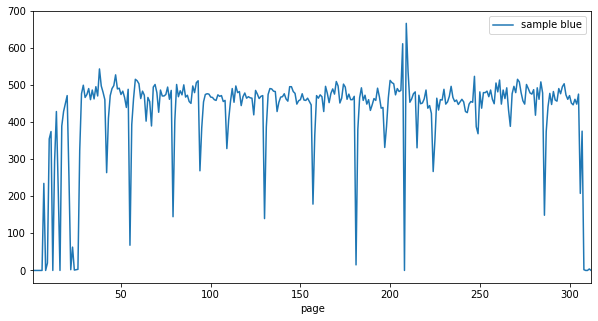

In [154]:
import matplotlib.pyplot as plt
tokens.plot(figsize=(10,5), label='sample blue')
plt.legend()
plt.show()

,page,section,token,pos,count
0,9.0,body,",",",",1
1,9.0,body,9,CD,2
2,9.0,body,=,SYM,2
3,9.0,body,BLOOMINGTON,NN,1
4,9.0,body,California,NNP,1
